# Pandas

1. `DataFrames` y  `Series`
2. Operaciones básicas

`pandas` es una librería que proporciona herramientas analíticas y estructuras de datos con alto rendimiento y facilidad de uso. En particular, la clase `DataFrame` es útil para representación y manipulación de datos heterogéneos tabulados (hojas de cálculo, tabla SQL, etc.)   

## Características
- Ofrece estructuras de datos flexibles y expresivas diseñadas para trabajar con datos tabulados y etiquetados, esta son: `Series` y  `DataFrame`.
- Posee herramientas robustas de lectura/escritura de datos desde ficheros con formatos conocidos como: CSV, XLS. SQL, HDF5, entre otros.
- Permite filtrar, agregar, o eliminar datos.
- Combina las características de las matrices de alto rendimiento de `numpy` con capacidades de manipulación de datos tabulados.

Para importar los módulos de la librería `pandas`, por convención se utiliza:

In [68]:
import pandas as pd  # 'pd' alias de pandas
import numpy as np

## DataFrames y Series

Las funcionalidades de `pandas` se basan en dos estructuras de datos fundamentales: *Series* y *DataFrames*.

Una `Series` es un objeto que contiene un `array` unidimensional de datos y un `array` de etiquetas, conocido como *índice*. Si no se especifica un índice o etiqueta, este se genera internamente como una secuencia ordenada de números enteros.

```python
s = pd.Series(data, index=index)
```

Un `DataFrame` es una estructura de datos que almacena datos de forma tabular, es decir, ordenada en filas y columnas etiquetadas. Cada fila (`row`) contiene una observación y cada columna (`column`) una variable. Un `DataFrame` acepta datos heterogéneos, es decir, variables pueden ser de distinto tipo (numérico, string, boolean, etc.). Además de contener datos, un `DataFrame` contiene el nombre de las variables y sus tipos, y métodos que permiten acceder y modificar los datos.

```python
s = pd.DataFrame(data, ...)
```

Las `Series` y `DataFrame` permiten representar datos 1D y 2D. Para representar datos con más dimensiones `pandas` posee otras estructuras de datos más complejas (en fase experimental), llamadas `Panel`, `Panel4D`, `PanelND`. Estas estructuras están fuera del alcance de este curso.

---
# Series en Pandas

## Creación de Series


In [69]:
# Crear una Series con índices automáticos a partir de una lista

serie = pd.Series([1979, 1980, 1981, 1982])
serie

0    1979
1    1980
2    1981
3    1982
dtype: int64

Las `Series` poseen dos atributos: `values`  e `index`. El primero es un `numpy array` que almacena los datos, y el segundo es un objeto que contiene los índices.

In [70]:
serie.values

array([1979, 1980, 1981, 1982])

In [71]:
serie.index

RangeIndex(start=0, stop=4, step=1)

Al crear una `Series` se puede definir explícitamente un `array` índice y pasarlo como argumento.

In [72]:
# Crear Series con índices definidos

serie = pd.Series(data=[1979, 1980, 1981, 1982, 1983],
                  index=['carolina', 'carla', 'andrea', 'teresa', 'andrea'])
serie

carolina    1979
carla       1980
andrea      1981
teresa      1982
andrea      1983
dtype: int64

También se pueden crear `Series` a partir de diccionarios, `numpy arrays`, desde ficheros, etc.

In [73]:
# Serie a partir de un numpy array

serie = pd.Series(np.random.randn(10))
serie

0    0.041357
1   -0.378833
2   -1.669110
3   -2.275750
4    0.105090
5    1.209898
6   -0.728009
7   -0.242968
8   -0.047186
9    1.500320
dtype: float64

In [74]:
# Serie a partir de un diccionario

dicc = {'cuadrado de {}'.format(i): i * i for i in range(11)}
print(dicc)

{'cuadrado de 0': 0, 'cuadrado de 1': 1, 'cuadrado de 2': 4, 'cuadrado de 3': 9, 'cuadrado de 4': 16, 'cuadrado de 5': 25, 'cuadrado de 6': 36, 'cuadrado de 7': 49, 'cuadrado de 8': 64, 'cuadrado de 9': 81, 'cuadrado de 10': 100}


In [75]:
serie_dicc = pd.Series(dicc)
serie_dicc

cuadrado de 0       0
cuadrado de 1       1
cuadrado de 10    100
cuadrado de 2       4
cuadrado de 3       9
cuadrado de 4      16
cuadrado de 5      25
cuadrado de 6      36
cuadrado de 7      49
cuadrado de 8      64
cuadrado de 9      81
dtype: int64

In [76]:
# Serie a partir de fichero
# Al asignar una columna y el squeeze a True convierte el resultado en Series en lugar de Dataframe

serie_pokemon = pd.read_csv('data/pokemon.csv',squeeze=True, usecols=['Name'])
serie_pokemon


0                   Bulbasaur
1                     Ivysaur
2                    Venusaur
3               Mega Venusaur
4                  Charmander
5                  Charmeleon
6                   Charizard
7            Mega Charizard X
8            Mega Charizard Y
9                    Squirtle
10                  Wartortle
11                  Blastoise
12             Mega Blastoise
13                   Caterpie
14                    Metapod
15                 Butterfree
16                     Weedle
17                     Kakuna
18                   Beedrill
19              Mega Beedrill
20                     Pidgey
21                  Pidgeotto
22                    Pidgeot
23               Mega Pidgeot
24                    Rattata
25                   Raticate
26                    Spearow
27                     Fearow
28                      Ekans
29                      Arbok
                ...          
770                   Sylveon
771                  Hawlucha
772       

---
## Acceso a datos en Series


El acceso a los datos se puede realizar mediante el índice categórico o el numérico que genera internamente Pandas

In [77]:
# Creamos de nuevo la serie inicial

serie = pd.Series(data=[1979, 1980, 1981, 1982, 1983],
                  index=['carolina', 'carla', 'andrea', 'teresa', 'andrea'])
serie

carolina    1979
carla       1980
andrea      1981
teresa      1982
andrea      1983
dtype: int64

In [78]:
# Indexación mediante etiqueta
print(serie['carla'])

1980


In [79]:
# Indexación mediante índice numérico interno
print(serie[1])

1980


In [80]:
# El índice puede contener valores duplicados
print(serie['andrea'])

andrea    1981
andrea    1983
dtype: int64


Podemos seleccionar varios valores indicando un intervalo de índices

In [81]:
# Recuperamos desde el valor de la posición 1 (el primer elemento tiene un index = 0) hasta el final del índice.
serie[1:]

carla     1980
andrea    1981
teresa    1982
andrea    1983
dtype: int64

In [82]:
# Recuperamos los elementos desde la posición 1 a la 2
serie[1:3]

carla     1980
andrea    1981
dtype: int64

In [83]:
# Podemos usar también índices negativos
serie[-4:-2]

carla     1980
andrea    1981
dtype: int64

---
## Métodos en Series

Para **añadir** nuevos elementos a una Series usamos el método `append`:

In [84]:
pd.isnull(np.nan)

True

In [85]:
s1 = pd.Series(np.arange(10))
s2 = pd.Series(np.arange(10, 21))

s3 = s1.append(s2)
s3

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
0     10
1     11
2     12
3     13
4     14
5     15
6     16
7     17
8     18
9     19
10    20
dtype: int64

In [86]:
# Se mantienen los índices de cada serie
s3[1]

1     1
1    11
dtype: int64

También podemos concatenar series generando un índice nuevo:

In [87]:
s3 = s1.append(s2, ignore_index=True)
s3

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
dtype: int64

In [88]:
s3[1]

1

In [89]:
max(s1.index)

9

In [90]:
# set_value edita el contenido del índice indicado o añade un nuevo item si no existe el índice
s4 = s1.set_value(5, 100)
s4

/home/deborah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


0      0
1      1
2      2
3      3
4      4
5    100
6      6
7      7
8      8
9      9
dtype: int64

In [91]:
# El méotdo pop devuelve y elimina de la serie original el valor del índice pasado
val_pop = s1.pop(3)
print(val_pop)
print(s1)

3
0      0
1      1
2      2
4      4
5    100
6      6
7      7
8      8
9      9
dtype: int64


In [92]:
# Ordena los valores, por defecto de menos a más.

serie_pokemon.sort_values()

510                 Abomasnow
68                       Abra
392                     Absol
678                  Accelgor
750     Aegislash Blade Forme
751    Aegislash Shield Forme
153                Aerodactyl
332                    Aggron
205                     Aipom
70                   Alakazam
655                 Alomomola
365                   Altaria
768                    Amaura
471                   Ambipom
652                 Amoonguss
195                  Ampharos
379                   Anorith
29                      Arbok
64                   Arcanine
552                    Arceus
627                    Archen
628                  Archeops
182                   Ariados
380                   Armaldo
753                Aromatisse
330                      Aron
156                  Articuno
590                    Audino
769                   Aurorus
789                   Avalugg
                ...          
604                Whirlipede
372                  Whiscash
317       

In [93]:
# Ordenamos de forma descendente

serie_pokemon.sort_values(ascending=False)

794        Zygarde Half Forme
695                  Zweilous
46                      Zubat
631                     Zorua
632                   Zoroark
286                 Zigzagoon
707                    Zekrom
582                 Zebstrika
157                    Zapdos
367                  Zangoose
793                   Yveltal
520                   Yanmega
208                     Yanma
623                    Yamask
792                   Xerneas
192                      Xatu
394                    Wynaut
288                   Wurmple
460      Wormadam Trash Cloak
459      Wormadam Sandy Cloak
458      Wormadam Plant Cloak
209                    Wooper
586                    Woobat
217                 Wobbuffet
301                   Wingull
45                 Wigglytuff
317                   Whismur
372                  Whiscash
604                Whirlipede
607                Whimsicott
                ...          
769                   Aurorus
590                    Audino
156       

In [94]:
# Para que los cambios modifique realmente la serie hay que indicarlo mediante el parámetro inplace
serie_pokemon.sort_values(inplace=True)
serie_pokemon

510                 Abomasnow
68                       Abra
392                     Absol
678                  Accelgor
750     Aegislash Blade Forme
751    Aegislash Shield Forme
153                Aerodactyl
332                    Aggron
205                     Aipom
70                   Alakazam
655                 Alomomola
365                   Altaria
768                    Amaura
471                   Ambipom
652                 Amoonguss
195                  Ampharos
379                   Anorith
29                      Arbok
64                   Arcanine
552                    Arceus
627                    Archen
628                  Archeops
182                   Ariados
380                   Armaldo
753                Aromatisse
330                      Aron
156                  Articuno
590                    Audino
769                   Aurorus
789                   Avalugg
                ...          
604                Whirlipede
372                  Whiscash
317       

In [95]:
# Si queremos ordernar mediante el índice recurrimos a sort_index()

serie_pokemon.sort_index()

0                   Bulbasaur
1                     Ivysaur
2                    Venusaur
3               Mega Venusaur
4                  Charmander
5                  Charmeleon
6                   Charizard
7            Mega Charizard X
8            Mega Charizard Y
9                    Squirtle
10                  Wartortle
11                  Blastoise
12             Mega Blastoise
13                   Caterpie
14                    Metapod
15                 Butterfree
16                     Weedle
17                     Kakuna
18                   Beedrill
19              Mega Beedrill
20                     Pidgey
21                  Pidgeotto
22                    Pidgeot
23               Mega Pidgeot
24                    Rattata
25                   Raticate
26                    Spearow
27                     Fearow
28                      Ekans
29                      Arbok
                ...          
770                   Sylveon
771                  Hawlucha
772       

In [96]:
# Nos devuelve el número de items de cada elemento
serie_pokemon.value_counts()

Rattata                   1
Salamence                 1
Mega Gardevoir            1
Treecko                   1
Stantler                  1
Tornadus Therian Forme    1
Rapidash                  1
Gigalith                  1
Sandslash                 1
Mega Latios               1
Hippowdon                 1
Palkia                    1
Tepig                     1
Togepi                    1
Deoxys Normal Forme       1
Shieldon                  1
Woobat                    1
Lileep                    1
Goodra                    1
Machoke                   1
Plusle                    1
Beautifly                 1
Zubat                     1
Spewpa                    1
Arbok                     1
Durant                    1
Moltres                   1
Feraligatr                1
Karrablast                1
Lanturn                   1
                         ..
Xatu                      1
Magcargo                  1
Keldeo Ordinary Forme     1
Spheal                    1
Kadabra             

In [97]:
# El método apply permite aplicar una función a todos los elementos de la serie.

serie_pokemon.apply(lambda name: str(name)+'_blue')

510                 Abomasnow_blue
68                       Abra_blue
392                     Absol_blue
678                  Accelgor_blue
750     Aegislash Blade Forme_blue
751    Aegislash Shield Forme_blue
153                Aerodactyl_blue
332                    Aggron_blue
205                     Aipom_blue
70                   Alakazam_blue
655                 Alomomola_blue
365                   Altaria_blue
768                    Amaura_blue
471                   Ambipom_blue
652                 Amoonguss_blue
195                  Ampharos_blue
379                   Anorith_blue
29                      Arbok_blue
64                   Arcanine_blue
552                    Arceus_blue
627                    Archen_blue
628                  Archeops_blue
182                   Ariados_blue
380                   Armaldo_blue
753                Aromatisse_blue
330                      Aron_blue
156                  Articuno_blue
590                    Audino_blue
769                 

In [98]:
# Para ver información adicional de un método

help(s1.set_value)

Help on method set_value in module pandas.core.series:

set_value(label, value, takeable=False) method of pandas.core.series.Series instance
    Quickly set single value at passed label. If label is not contained, a
    new object is created with the label placed at the end of the result
    index
    
    .. deprecated:: 0.21.0
    
    Please use .at[] or .iat[] accessors.
    
    Parameters
    ----------
    label : object
        Partial indexing with MultiIndex not allowed
    value : object
        Scalar value
    takeable : interpret the index as indexers, default False
    
    Returns
    -------
    series : Series
        If label is contained, will be reference to calling Series,
        otherwise a new object



In [99]:
# Muestra una lista de funciones del objeto Series

dir(serie_dicc)  

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__

---
# Dataframes en Pandas

## Creación de Dataframes

A diferencia de `Series`, los `DataFrame` están diseñados para almacenar datos heterogéneos multivariables. Por ejemplo:

**Sobre cuando se modifica o no el df...**
In general, a pandas dataframe is only modified by either reassigning df = modified_df or if you set inplace=True flag. 

Also dataframe will change if you pass a dataframe to a function by reference and the function modifies the dataframe .

Pero esto es sólo como idea, no siempre es así, ver .ix or .where.

In [100]:
# Índice de filas automático

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
df

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [101]:
# DataFrame a partir de un diccionario de listas e índice

df = pd.DataFrame({'nombre': ['Pablo', 'Teresa'],
                   'score': [22.2, 33.3]},
                  index=['pacunar', 'tono'])
df

,nombre,score
pacunar,Pablo,22.2
tono,Teresa,33.3


In [102]:
# Dataframe a partir fichero

nba = pd.read_csv('data/nba.csv')
nba

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


In [103]:
nba.index

RangeIndex(start=0, stop=3922, step=1)

Se pueden consultar el nombre de las variables usando el atributo `columns`

In [104]:
nba.columns

Index(['Player', 'height', 'weight', 'collage', 'born', 'birth_city',
       'birth_state'],
      dtype='object')

Adicionalemnte `Pandas` permite crear Dataframes a partir de otras fuentes, como son jsons, urls...

---
## Acceso a datos en Dataframes


Se pueden extraer columnas de un `DataFrame` con la etiqueta de la columna (sólo si es un identificador Python válido)  usando notación tipo diccionario o como atributo del objeto. En ambos casos se obtiene un objeto tipo `Series`.

In [105]:
nba['Player']  # tipo diccionario

0             Curly Armstrong
1                Cliff Barker
2               Leo Barnhorst
3                  Ed Bartels
4                 Ralph Beard
5                  Gene Berce
6               Charlie Black
7                 Nelson Bobb
8             Jake Bornheimer
9                Vince Boryla
10                  Don Boven
11              Harry Boykoff
12                Joe Bradley
13                Bob Brannum
14                 Carl Braun
15              Frankie Brian
16           Price Brookfield
17                  Bob Brown
18                 Jim Browne
19                 Walt Budko
20             Jack Burmaster
21               Tommy Byrnes
22               Bill Calhoun
23                Don Carlson
24              Bob Carpenter
25                Jake Carter
26                  Al Cervi*
27                John Chaney
28              Leroy Chollet
29                 Bill Closs
                ...          
3892           Chinanu Onuaku
3893     Georgios Papagiannis
3894      

In [106]:
nba.Player  # tipo atributo

0             Curly Armstrong
1                Cliff Barker
2               Leo Barnhorst
3                  Ed Bartels
4                 Ralph Beard
5                  Gene Berce
6               Charlie Black
7                 Nelson Bobb
8             Jake Bornheimer
9                Vince Boryla
10                  Don Boven
11              Harry Boykoff
12                Joe Bradley
13                Bob Brannum
14                 Carl Braun
15              Frankie Brian
16           Price Brookfield
17                  Bob Brown
18                 Jim Browne
19                 Walt Budko
20             Jack Burmaster
21               Tommy Byrnes
22               Bill Calhoun
23                Don Carlson
24              Bob Carpenter
25                Jake Carter
26                  Al Cervi*
27                John Chaney
28              Leroy Chollet
29                 Bill Closs
                ...          
3892           Chinanu Onuaku
3893     Georgios Papagiannis
3894      

In [107]:
# Mediante la notación de dobles [] obtenemos un Dataframe en lugar de una Serie

nba[['Player']]


,Player
0,Curly Armstrong
1,Cliff Barker
2,Leo Barnhorst
3,Ed Bartels
4,Ralph Beard
5,Gene Berce
6,Charlie Black
7,Nelson Bobb
8,Jake Bornheimer
9,Vince Boryla


In [108]:
type(nba.Player), type(nba['Player']), type(nba[['Player']])

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

In [109]:
# Podemos recuperar varias columnas a la vez

nba[['Player','height']]

,Player,height
0,Curly Armstrong,180.0
1,Cliff Barker,188.0
2,Leo Barnhorst,193.0
3,Ed Bartels,196.0
4,Ralph Beard,178.0
5,Gene Berce,180.0
6,Charlie Black,196.0
7,Nelson Bobb,183.0
8,Jake Bornheimer,196.0
9,Vince Boryla,196.0


Para acceder a las filas, se puede usar el atributo `ix` o la función `iloc`.

In [110]:
# Permite acceder al contenido de un registro mediante la etiqueta del índice

df.loc['tono']

nombre    Teresa
score       33.3
Name: tono, dtype: object

In [111]:
# Permite acceder al contenido de un registro mediante la posición del índice

df.iloc[1]

nombre    Teresa
score       33.3
Name: tono, dtype: object

In [112]:
# Podemos acceder a un valor concreto usando el acceso a datos visto anteriormente en Series

df.iloc[1]['score']

33.3

In [113]:
df

,nombre,score
pacunar,Pablo,22.2
tono,Teresa,33.3


In [114]:
#Seleccionar columnas de un df según el tipo: 
df.select_dtypes(include=[int,float]).sum() # o exclude


score    55.5
dtype: float64

---
## Métodos en Dataframes


Vemos algunos métodos útiles de la clase Dataframe

In [115]:
import pandas as pd
data = pd.read_csv('data/baseball.csv', sep=',')
type(data)

pandas.core.frame.DataFrame

In [116]:
# Nos indica el número de columnas y filas del dataframe

data.shape

(100, 23)

In [117]:

data.values

array([[88641, 'womacto01', 2006, ..., 3.0, 0.0, 0.0],
       [88643, 'schilcu01', 2006, ..., 0.0, 0.0, 0.0],
       [88645, 'myersmi01', 2006, ..., 0.0, 0.0, 0.0],
       ...,
       [89530, 'ausmubr01', 2007, ..., 4.0, 1.0, 11.0],
       [89533, 'aloumo01', 2007, ..., 0.0, 3.0, 13.0],
       [89534, 'alomasa02', 2007, ..., 0.0, 0.0, 0.0]], dtype=object)

In [118]:
# Devuelve los n primeros registros (5 por defecto)

data.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Devuelve los n ultimos registros (5 por defecto)

data.tail(3)

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
99,89534,alomasa02,2007,1,NYN,NL,8,22,1,3,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# Devuelve un resumen estadístico de las variables

data.describe(include='all')

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.000000,100,100.00000,100.000000,100,100,100.000000,100.000000,100.00000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
unique,NaN,82,NaN,NaN,27,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,gonzalu01,NaN,NaN,NYN,NL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,12,62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,89352.660000,NaN,2006.92000,1.130000,NaN,NaN,52.380000,136.540000,18.69000,35.820000,...,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,218.910859,NaN,0.27266,0.337998,NaN,NaN,48.031299,181.936853,27.77496,50.221807,...,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,88641.000000,NaN,2006.00000,1.000000,NaN,NaN,1.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,89353.500000,NaN,2007.00000,1.000000,NaN,NaN,9.500000,2.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,89399.000000,NaN,2007.00000,1.000000,NaN,NaN,33.000000,40.500000,2.00000,8.000000,...,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,89465.250000,NaN,2007.00000,1.000000,NaN,NaN,83.250000,243.750000,33.25000,62.750000,...,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000


In [121]:
# Devuelve un resumen de la estructura

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
id        100 non-null int64
player    100 non-null object
year      100 non-null int64
stint     100 non-null int64
team      100 non-null object
lg        100 non-null object
g         100 non-null int64
ab        100 non-null int64
r         100 non-null int64
h         100 non-null int64
X2b       100 non-null int64
X3b       100 non-null int64
hr        100 non-null int64
rbi       100 non-null float64
sb        100 non-null float64
cs        100 non-null float64
bb        100 non-null int64
so        100 non-null float64
ibb       100 non-null float64
hbp       100 non-null float64
sh        100 non-null float64
sf        100 non-null float64
gidp      100 non-null float64
dtypes: float64(9), int64(11), object(3)
memory usage: 18.0+ KB


In [122]:
# Devuelve una lista con las etiquetas de las columnas y de las filas

data.axes

[RangeIndex(start=0, stop=100, step=1),
 Index(['id', 'player', 'year', 'stint', 'team', 'lg', 'g', 'ab', 'r', 'h',
        'X2b', 'X3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh',
        'sf', 'gidp'],
       dtype='object')]

In [123]:
# Devuelve el número de elementos únicos por campo

data.nunique()

id        100
player     82
year        2
stint       2
team       27
lg          2
g          60
ab         63
r          38
h          46
X2b        28
X3b         5
hr         22
rbi        43
sb         12
cs          7
bb         40
so         47
ibb        13
hbp        10
sh         14
sf          9
gidp       17
dtype: int64

In [57]:
data.id.unique()

array([88641, 88643, 88645, 88649, 88650, 88652, 88653, 88662, 89177,
       89178, 89330, 89333, 89334, 89335, 89336, 89337, 89338, 89339,
       89340, 89341, 89343, 89345, 89347, 89348, 89352, 89354, 89355,
       89359, 89360, 89361, 89363, 89365, 89366, 89367, 89368, 89370,
       89371, 89372, 89374, 89375, 89378, 89381, 89382, 89383, 89384,
       89385, 89388, 89389, 89396, 89398, 89400, 89402, 89406, 89410,
       89411, 89412, 89420, 89421, 89425, 89426, 89429, 89430, 89431,
       89438, 89439, 89442, 89445, 89450, 89451, 89452, 89460, 89462,
       89463, 89464, 89465, 89466, 89467, 89468, 89469, 89473, 89474,
       89480, 89481, 89482, 89489, 89493, 89494, 89495, 89497, 89498,
       89499, 89501, 89502, 89521, 89523, 89525, 89526, 89530, 89533,
       89534])

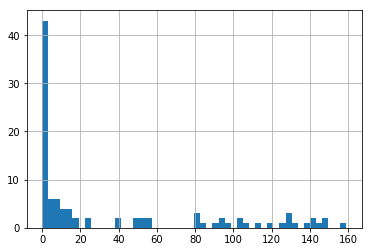

In [143]:
#df.Age.box/hist/line/bar... no hace falta importar la librería matplotlib. 
#Pandas por dentro importa matplotlib, numpy...

%matplotlib inline

data.h.hist(bins = 50)

# Ejercicios

Considere el siguiente diccionario `data` y lista de `index`

In [58]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

- a. Crea un DataFrame a partir del diccionario y los índices.
- b. Selecciona las columnas `animal`y `age`.
- c. Indique cuantos tipos distintos de animales hay.
- d. Indique cuantos animales hay de cada tipo.
- e. Muestre un resumen estadístico de todas las variables.

##### Solución Ejercicio 1

Crea un DataFrame a partir del diccionario y los índices.

In [59]:
# Aqui su respuesta

Selecciona las columnas `animal`y `age`.


In [60]:
# Aqui su respuesta

Indique el número de animales distintos.


In [61]:
# Aqui su respuesta

Indique cuantos animales hay de cada tipo.


In [62]:
# Aqui su respuesta

Muestre un resumen estadístico de todas las variables.


In [63]:
# Aqui su respuesta